### Email Classifier

#### Classify the email using the binary classification method. Email Spam detection has two states: a) Normal State Not Spam, b) Abnormal State Spam. Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze the performance.

In [75]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv("C:\\Users\\SHAHAJI KARANDE\\Documents\\BE\\LP3\\ML\\Assign_2\\emails.csv")

In [77]:
df.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [79]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [80]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [81]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [82]:
df.dropna(inplace=True)
df.drop(columns=['Email No.'], axis=1,inplace=True)

In [83]:
from sklearn.model_selection import train_test_split

X = df.drop('Prediction',axis=1)
y = df['Prediction']

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [84]:
# 1. KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Accuracy Score:  0.8608247422680413
Confusion Matrix: 
 [[958 139]
 [ 77 378]]
Classification Report: n               precision    recall  f1-score   support

           0       0.93      0.87      0.90      1097
           1       0.73      0.83      0.78       455

    accuracy                           0.86      1552
   macro avg       0.83      0.85      0.84      1552
weighted avg       0.87      0.86      0.86      1552



<Axes: >

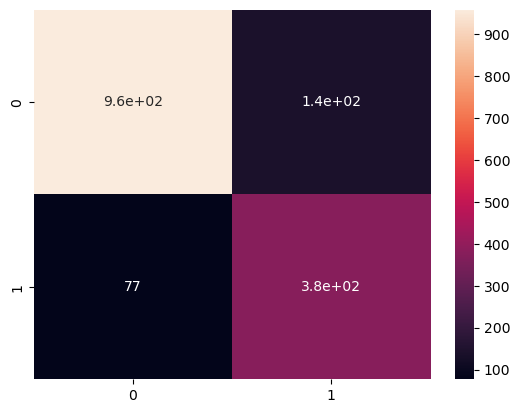

In [85]:
# Accuracy Score, Confusion Matrix, Classification Report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("Classification Report: n",classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [86]:
# 2. Support Vector Machine (SVM)

from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

Accuracy Score:  0.9568298969072165
Confusion Matrix: 
 [[1062   35]
 [  32  423]]
Classification Report: n               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1097
           1       0.92      0.93      0.93       455

    accuracy                           0.96      1552
   macro avg       0.95      0.95      0.95      1552
weighted avg       0.96      0.96      0.96      1552



<Axes: >

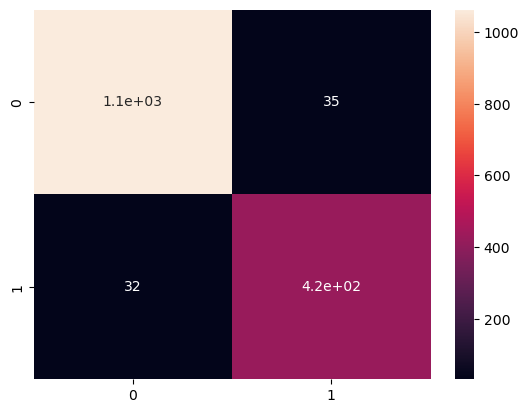

In [87]:
# Accuracy Score, Confusion Matrix, Classification Report

print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("Classification Report: n",classification_report(y_test, y_pred))

import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)